## Benourlli
Scrivere un esercizio che generi numeri random che seguano una distribuzione Binomiale

In [1]:
import numpy as np

def bernoulli(p):
    x = np.random.rand()
    return (1 if x < p else 0)

def binomiale(n, p):
    return np.array([bernoulli(p) for i in range(n)])

n = 1000
p = 0.2

x = binomiale(n, p)
successi = np.sum(x==1)
insuccessi = n-successi

print(f"Numero di successi: {successi} \n")
print(f"Numero di insuccessi: {insuccessi} \n")

Numero di successi: 206 

Numero di insuccessi: 794 



In [2]:
x = np.random.binomial(1, p, n)

successi = np.sum(x)
print(f'Numero di successi: {successi/n*100:.2f}%')

Numero di successi: 20.20%


## Multinomiale
Scrivere un esercizio che generi numeri random che seguano una distribuzione di Multinomiale. 

[1/4, 1/2, 1/4]

Generare 2000 di questi numeri e costruire un'istogramma verificando l'accordo con la distribuzione teorica seguita

M: [0.228 0.511 0.261]


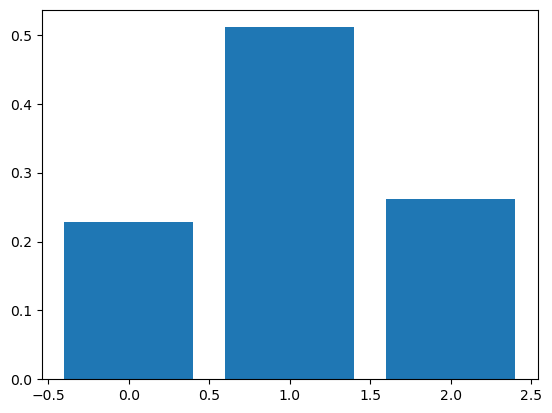

In [3]:
import matplotlib.pyplot as plt

def multinomiale(n, p):
    M = np.zeros(len(p))
    F = np.cumsum(p)
    for _ in range(n):
        xi = np.random.rand()
        x = np.nonzero(xi < F)[0][0] # indice della partizione in cui ricade il numero random
        M[x]+=1
    return M
    
    
n = 1000
p = np.array([1/4, 1/2, 1/4])

x = np.arange(len(p))
y = multinomiale(n, p)/n

print(f'M: {y}')

plt.bar(x, y)
plt.show()

M: [0.228 0.511 0.261]
M: [0.255 0.481 0.264]


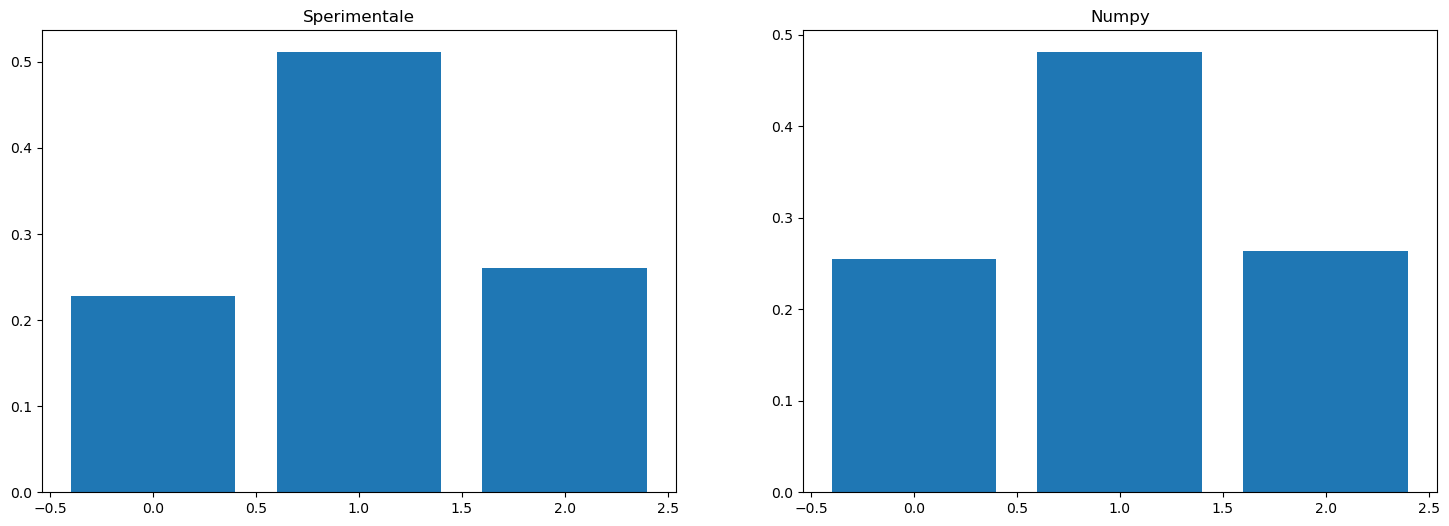

In [4]:
y2 = np.random.multinomial(n, p)/n

print(f'M: {y}')
print(f'M: {y2}')

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
ax1.bar(x, y)
ax1.set_title("Sperimentale")
ax2.bar(x, y2)
ax2.set_title("Numpy")

plt.show()

# Metodo di inversione della funzione di ripartizione

## Uniforme
Generare numeri random con distribuzione uniforme in AB. Verificare che sia invertibile con un istogramma

Densità teorica:[0.5 0.5 0.5 ... 0.5 0.5 0.5]


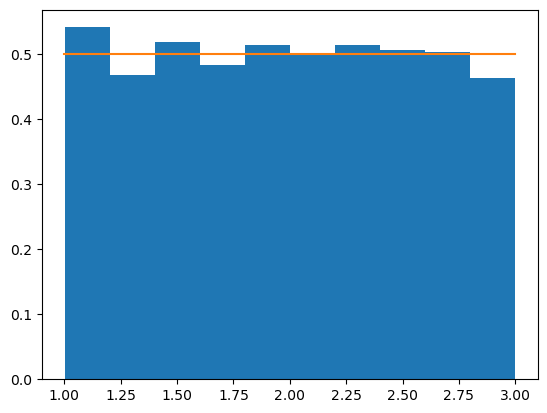

In [5]:
from scipy.stats import probplot, uniform

a = 1
b = 3
n = 2000
x = np.random.rand(n) # genero n campioni random

y = a + x * (b-a) # seguono una legge uniforme
p = uniform.pdf(y, a, b-a) # oppure p = 1/(b-a)
print(f'Densità teorica:{p}')

xx = np.linspace(a, b, 1000)
yy = uniform.pdf(xx, a, b-a)

plt.hist(y, density=True)
plt.plot(xx, yy)

plt.show()

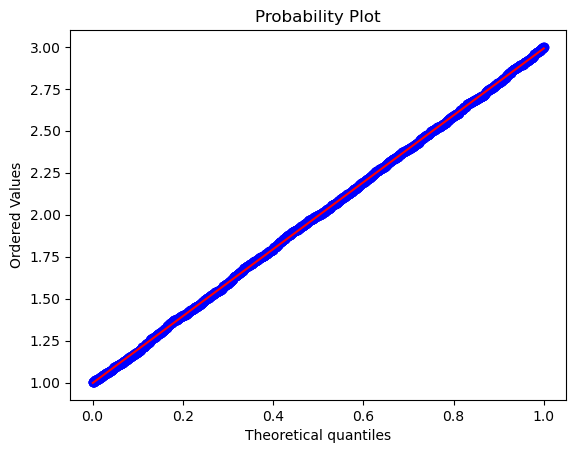

In [6]:
fig, ax = plt.subplots(1,1)
probplot(y, dist=uniform, plot=ax)
plt.show()

## Esponenziale
Generare numeri random con distribuzione esponenziale di parametro Lambda, Verificare che sia invertibile con un istogramma

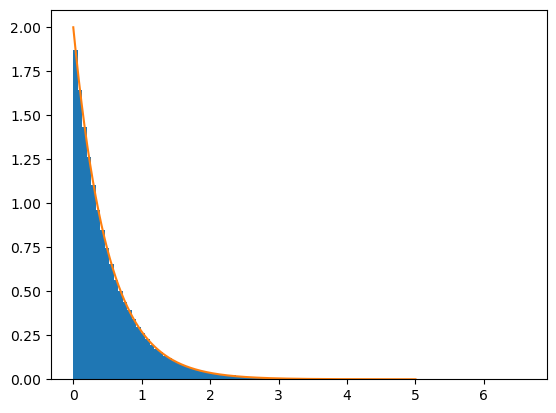

In [7]:
from scipy.stats import expon

lam = 2
n = 200000
x = np.random.rand(n)

y = -np.log(x)/lam # seguono una legge esponenziale

xx = np.linspace(0, 5, n)
yy = expon.pdf(xx, scale=1/lam) # andamento teorico

plt.hist(y, bins=100, density=True)
plt.plot(xx, yy)

plt.show()

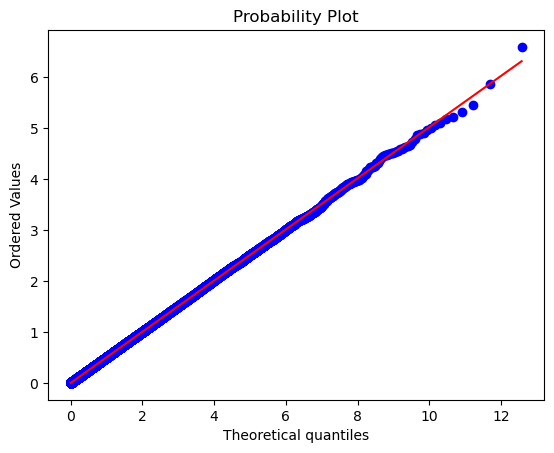

In [8]:
fig, ax = plt.subplots(1,1)
probplot(y, dist=expon, plot=ax)
plt.show()

## Normale

Generare numeri random con distribuzione normale. Verificare che sia invertibile con un istogramma

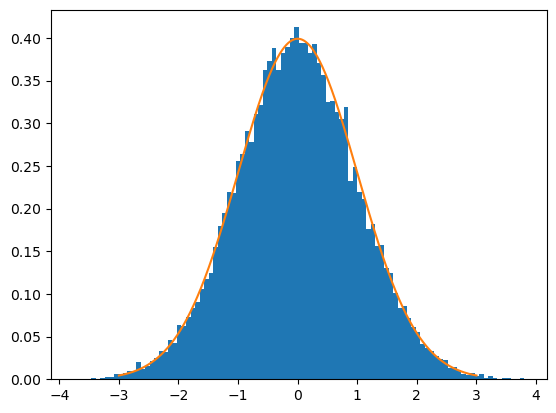

In [9]:
from scipy.stats import norm

n = 20000
x = np.random.rand(n)

# Divido in due insiemi da n/2 i numeri random generati
xi1 = x[0:int(n/2)]
xi2 = x[int(n/2): n]

eta1 = np.sqrt(-2*np.log(xi1))*np.cos(2*np.pi*xi2)
eta2 = np.sqrt(-2*np.log(xi1))*np.sin(2*np.pi*xi2)

mu = 0
sig = 1

xx = np.linspace(-3*sig, 3*sig, 1000)
yy = norm.pdf(xx, mu, sig)
y = np.concatenate((eta1, eta2))

plt.hist(y, bins=100, density=True)
plt.plot(xx, yy)

plt.show()

## Generare sequenze di numeri random che seguano le seguenti distribuzioni note :
- U([-1, 1])
- EXP(3)
- N(1, 2)
- Chi2(5)

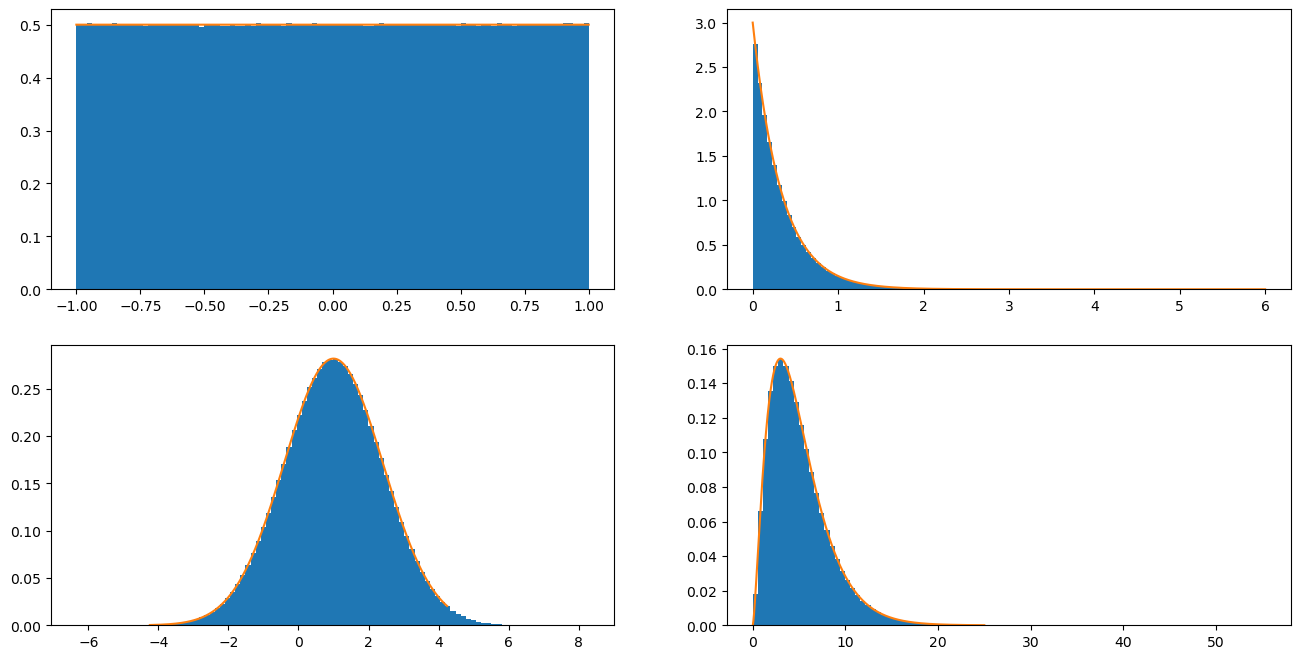

In [11]:
from scipy.stats import uniform, expon, norm, chi2

def uniforme(a, b, n):
    x = np.random.rand(n)
    y = a + x*(b-a)
    return y

def esponenziale(lam, n):
    x = np.random.rand(n)
    y = -np.log(x)/lam
    return y

def normale(mu, sig, n):
    x = np.random.rand(n)

    xi1 = x[0 : int(n/2)]
    xi2 = x[int(n/2) : n]
    
    eta1 = np.sqrt(-2*np.log(xi1))*np.cos(2*np.pi*xi2)
    eta2 = np.sqrt(-2*np.log(xi1))*np.sin(2*np.pi*xi2)

    y = np.zeros(n)
    y[0 : int(n/2)] = mu + sig*eta1
    y[int(n/2) : n] = mu + sig*eta2
    
    return y

def chi_quadro(df, n):    
    y = np.array([normale(0, 1, n*df)]) # genero n*df
    y = y**2
    y2 = y.reshape(df, -1)
    y = np.sum(y2, axis=0)
    
    return y

n = 10000000
a = -1
b = 1

# Uniforme
x1 = np.linspace(a, b, n)
y1 = uniforme(a, b, n)
yy1 = uniform.pdf(x1, a, b-a)

lam = 3

# Esponenziale
x2 = np.linspace(0, 2*lam, n)
y2 = esponenziale(lam, n)
yy2 = expon.pdf(x2, scale=1/lam)

mu = 1
sig2 = 2
sig = np.sqrt(sig2)

# Normale
x3 = np.linspace(-3*sig, 3*sig, n)
y3 = normale(mu, sig, n)
yy3 = norm.pdf(x3, mu, sig)

df = 5

# Chi2
x4 = np.linspace(0, 25, n)
y4 = chi_quadro(df, n)
yy4 = chi2.pdf(x4, df)

# Grafico
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
ax1, ax2, ax3, ax4 = axs.flatten()

ax1.hist(y1, bins=100, density=True)
ax1.plot(x1, yy1)

ax2.hist(y2, bins=100, density=True)
ax2.plot(x2, yy2)

ax3.hist(y3, bins=100, density=True)
ax3.plot(x3, yy3)

ax4.hist(y4, bins=100, density=True)
ax4.plot(x4, yy4)

plt.show()

# Metodo del rigetto

Generare numeri pseudocasuali con distribuzione: <br><br>
$f(x) = \frac{1 + \cos(x)}{2 \pi}$

In [ ]:
import time

def f(x):
    return (1 + np.cos(x)) / (2 * np.pi)

def rigetto(a, b, M):
    while True:
        r1 = np.random.rand()
        r2 = np.random.rand()
        xi = a + r1 * (b - a) # uniforme in [a, b]
        eta = r2 * M # uniforme in [0, M]
        if eta <= f(xi):
            break
    return xi

a = -np.pi
b = np.pi
n = 100000
M = 1 / np.pi # punto di massimo di f(x)

start_time = time.time()  # Registra il tempo di inizio

x = np.array([rigetto(a, b, M) for _ in range(n)])

end_time = time.time()  # Registra il tempo di fine
elapsed_time = end_time - start_time
print(f"Tempo computazionale: {elapsed_time:.2f} secondi")

xx = np.linspace(a, b, 1000)
yy = f(xx)

plt.hist(x, bins=100, density=True)
plt.plot(xx, yy)
plt.show()

In [ ]:
n = 1000000
M = 1 / np.pi # punto di massimo di f(x)

start_time = time.time()  # Registra il tempo di inizio

x = np.array([rigetto(a, b, M) for _ in range(n)])

end_time = time.time()  # Registra il tempo di fine
elapsed_time = end_time - start_time
print(f"Tempo computazionale: {elapsed_time:.2f} secondi")

xx = np.linspace(a, b, 1000)
yy = f(xx)

plt.hist(x, bins=100, density=True)
plt.plot(xx, yy)
plt.show()

# Monte Carlo

Sia X ~ N(0,1). Si calcoli numericamente con il metodo hit or miss la probabilità che p = P(0.5 <= x <= 2)

In [ ]:
def f(x):
    return norm.pdf(x)

a = 0.5
b = 2

xx = np.linspace(-3, 3, 1000) # legge del 3_sigma
yy = f(xx)
plt.plot(xx, yy)
plt.show()

In [ ]:
M = 0.4 # preso dal grafico
n = 100000
ns = 0 # numero di hit
for i in range(n):
    r1 = np.random.rand()
    r2 = np.random.rand()
    xi = a + r1*(b-a) # segue una U in [a, b]
    eta = r2 * M # segue una U in [0, M]
    if f(xi) <= eta:
        ns += 1 # conta il numero di hit in n prove

p = ns/n
print(f'Probabilità: {p:.2f}')

I = p * M * (b-a)
print(f'Integrale: {I:.2f}')

phi = norm.cdf(b)-norm.cdf(a)
print(f'Phi: {phi:.2f}')